In [0]:
# Library import
import numpy as np
import random
import matplotlib.pyplot as plt

In [0]:
N = 2  # Maximum number of possible peak
Data_size = 300000  

Parameters = np.zeros((Data_size, N, 2))  # Set of Parameters ready
print(Parameters.shape[1])

2


In [0]:
# Lorentzian function that returns sum of multi-Lorentzian function with two arguments
def Lorentzian(x, *args):
    ''' returns sum of Multi-Lorentzian function 
    corresponding to each two arguments (a, b)'''
    a = args[::2]
    b = args[1::2]

    result = 0
    for i in range(len(a)):
        if a[i] > 0 and b[i] > 0:
            if len(a) == len(b):
                result += b[i]  / ((x - a[i])**2 + b[i]**2)
    return result 
    # noise = -0.2 ~ 0.2 

In [0]:
# X domain fixed
x = np.arange(-2, 4, 0.01)
print(len(x))

600


In [0]:
for i in range(len(Parameters)): # For each matrix in Parameter set...

    for j in range(Parameters.shape[1]): # For each raw in each matrix...
        
        # append two argument that will be used in Lorentzian function
        # Second parameter is constrained in range from 0.1 to 0.2
        Parameters[i][0] = np.array([[np.random.rand(), 0.1*np.random.rand() + 0.1]])
        Parameters[i][1] = np.array([[3 * np.random.rand(), 0.1*np.random.rand()+0.1]])
    
# Check out
print(Parameters)

[[[0.99178493 0.10916404]
  [1.20768849 0.17306695]]

 [[0.35641136 0.1657841 ]
  [0.74290973 0.17980007]]

 [[0.50756099 0.12368187]
  [1.10581701 0.14033688]]

 ...

 [[0.64503367 0.18247688]
  [1.74446244 0.14917474]]

 [[0.80298696 0.19223487]
  [0.55097345 0.19899333]]

 [[0.83101629 0.19120945]
  [2.20478006 0.1519058 ]]]


In [0]:
# ================== Data Generating ================
Data_x = []
Data_y = []

for j in Parameters:  # For each parameter matrix...

    peak = random.randint(2, N) # Random selection of Possible peak number
    j = list(j.reshape((2*N,))) # reshape processing to put it as *args in function, Since j is matrix

    if peak == 1:
        Data_x.append(Lorentzian(x, *j[0:2]))
        Data_y.append(np.array([sum(Lorentzian(x, *j[0:2])), peak]))

    elif peak == 2:
        Data_x.append(Lorentzian(x, *j[0:4]))
        Data_y.append(np.array([sum(Lorentzian(x, *j[0:4])), peak]))

    elif peak == 3:
        Data_x.append(Lorentzian(x, *j[0:6]))
        Data_y.append(np.array([sum(Lorentzian(x, *j[0:6])) ,peak]))

    elif peak == 4:
        Data_x.append(Lorentzian(x, *j[0:8]))
        Data_y.append(np.array([sum(Lorentzian(x, *j[0:8])), peak]))

    elif peak == 5:
        Data_x.append(Lorentzian(x, *j[0:]))
        Data_y.append(np.array([sum(Lorentzian(x, *j[0:])), peak]))

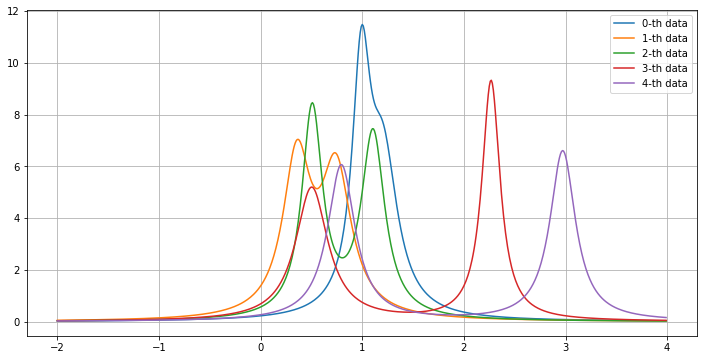

In [0]:
# Generated Data sample check!
plt.figure(figsize=(12, 6))

for i in range(5):
    plt.plot(x, Data_x[i], label = str(i) + '-th data')
    plt.legend()
    plt.grid('on')

In [0]:
for i in range(20):
    print(sum(Data_x[i]), len(list(filter(lambda x:x > 0, Data_y[i]))) /2)

609.4612281626463 1.0
604.6994033831361 1.0
610.4932625553994 1.0
606.3110569737253 1.0
599.4109750707731 1.0
611.1099540692021 1.0
605.3381381014948 1.0
603.5016720628367 1.0
611.4689418179614 1.0
609.1414006155541 1.0
609.2756984466721 1.0
608.9251030668636 1.0
590.7471803060289 1.0
608.2192241814264 1.0
607.1875337092982 1.0
610.4413201315526 1.0
597.8061332562246 1.0
595.9260995591344 1.0
603.5604240095025 1.0
601.158623149889 1.0


In [0]:
# Data spliting up into three group : training/validation/test

train_data = np.array(Data_x[:150000])
val_data = np.array(Data_x[150000:250000])
test_data = np.array(Data_x[250000:])

train_labels = np.array(Data_y[:150000])
val_labels = np.array(Data_y[150000:250000])
test_labels = np.array(Data_y[250000:])

In [0]:
# size test

print(train_data.shape, train_labels.shape)
print(val_data.shape, val_labels.shape)
print(test_data.shape, test_labels.shape)

(150000, 600) (150000, 2)
(100000, 600) (100000, 2)
(50000, 600) (50000, 2)


In [0]:
# reshape for Image-form setting
# 1차원일때 변환
train_data = train_data.reshape(150000, 600, 1)
val_data = val_data.reshape(100000, 600, 1)
test_data = test_data.reshape(50000, 600, 1)


In [0]:
# From Here on, let`s start to make Convolution Neural Network!

# Library import
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

# Modeling
model2 = Sequential()

model2.add(Conv1D(8, 20, activation='relu', input_shape=(600, 1)))
model2.add(MaxPooling1D(2)) 

model2.add(Conv1D(8, 10, activation='relu'))
model2.add(MaxPooling1D(2)) 

# Fully-Connected Layers
model2.add(GlobalMaxPooling1D())
model2.add(Dense(200, activation = 'relu'))
model2.add(Dropout(0.3))
model2.add(Dense(2))

model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 581, 8)            168       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 290, 8)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 281, 8)            648       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 140, 8)            0         
_________________________________________________________________
global_max_pooling1d (Global (None, 8)                 0         
_________________________________________________________________
dense (Dense)                (None, 200)               1800      
_________________________________________________________________
dropout (Dropout)            (None, 200)               0

In [0]:
model2.compile(loss='mse', metrics=[
               'mae'], optimizer=Adam())

In [0]:
%%time
hist2 = model2.fit(train_data, train_labels, 
                   epochs=30, 
                   batch_size=1000,
                   validation_data=(val_data, val_labels), verbose=2)

Epoch 1/30
150/150 - 2s - loss: 59677.2852 - mae: 138.4854 - val_loss: 9436.0029 - val_mae: 55.9319
Epoch 2/30
150/150 - 1s - loss: 10666.5166 - mae: 59.2034 - val_loss: 9296.1631 - val_mae: 55.6393
Epoch 3/30
150/150 - 1s - loss: 10399.8945 - mae: 57.8485 - val_loss: 9132.2314 - val_mae: 55.7123
Epoch 4/30
150/150 - 1s - loss: 10132.9404 - mae: 57.0235 - val_loss: 8890.3594 - val_mae: 54.6973
Epoch 5/30
150/150 - 1s - loss: 9858.1260 - mae: 56.1448 - val_loss: 8611.3838 - val_mae: 53.8872
Epoch 6/30
150/150 - 1s - loss: 9486.3936 - mae: 54.8402 - val_loss: 8183.3687 - val_mae: 51.5213
Epoch 7/30
150/150 - 1s - loss: 8978.0713 - mae: 53.2324 - val_loss: 7606.2671 - val_mae: 49.7501
Epoch 8/30
150/150 - 1s - loss: 8168.0718 - mae: 50.5463 - val_loss: 6487.5044 - val_mae: 45.2405
Epoch 9/30
150/150 - 1s - loss: 6502.5181 - mae: 44.9363 - val_loss: 4034.0264 - val_mae: 34.4742
Epoch 10/30
150/150 - 1s - loss: 3401.4280 - mae: 32.2477 - val_loss: 728.4721 - val_mae: 15.0253
Epoch 11/30
150

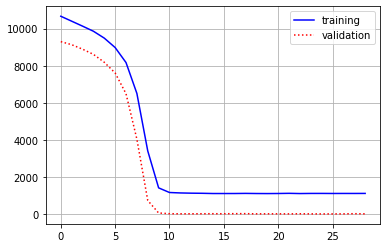

In [0]:
# Loss plot
plt.plot(hist2.history['loss'][1:], 'b-', label="training")
plt.plot(hist2.history['val_loss'][1:], 'r:', label="validation")
plt.grid(True)
plt.legend()
plt.show()

In [0]:
predict = model2.predict(test_data)

predict.shape

(50000, 2)

In [0]:
for i in range(10):
    print(predict[i])
    print(test_labels[i])
    print('==============')

[604.4818      2.0338356]
[605.91233528   2.        ]
[602.69635    2.029581]
[604.32274551   2.        ]
[600.7562      2.0249574]
[605.0273893   2.       ]
[603.01215     2.0303357]
[604.52713963   2.        ]
[601.59674     2.0269628]
[607.20108783   2.        ]
[603.1876      2.0307505]
[603.5393051   2.       ]
[604.9521      2.0349545]
[608.79416635   2.        ]
[605.47205     2.0361936]
[610.27670574   2.        ]
[612.3581      2.0510137]
[611.86115763   2.        ]
[601.3569      2.0263894]
[603.29437915   2.        ]


In [0]:
# Check the architecture of the CNN
print(model2.layers[0])
print(model2.layers[1])
print(model2.layers[2])
print(model2.layers[3])
print(model2.layers[4])
print(model2.layers[5])
print(model2.layers[6])
print(model2.layers[7])


In [0]:
for i in range(7):
    print(str(i) +'-th layer :', len(model2.layers[i].get_weights()))

0-th layer : 2
1-th layer : 0
2-th layer : 2
3-th layer : 0
4-th layer : 0
5-th layer : 2
6-th layer : 0


In [0]:
layer_0 = model2.layers[0].get_weights()

layer_2 = model2.layers[2].get_weights()

layer_5 = model2.layers[5].get_weights()

layer_6 = model2.layers[6].get_weights()



In [0]:
# 첫번째 컨볼루션 필터
filter_0 = layer_0[0]
filter_0.shape # 16개의 필터가 커널사이즈 10으로 존재함

(20, 1, 8)

In [0]:
# 2번째 컨볼루션 필터
filter_2 = layer_2[0]
filter_2.shape

(10, 8, 8)

In [0]:
# 완전연결층
layer_5[1].shape

(200,)

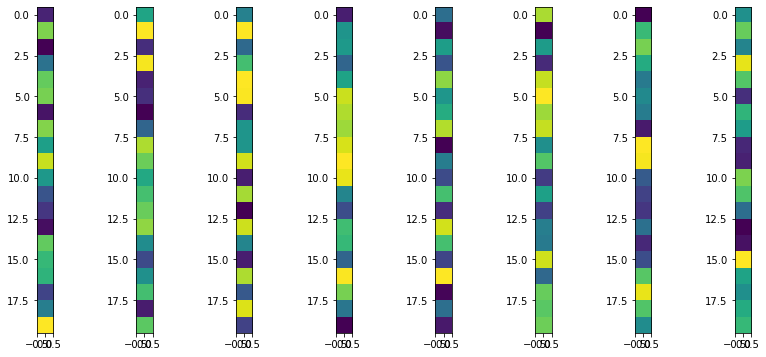

In [0]:
# 첫번째 컨볼루션 필터 시각화
M = 8
plt.figure(figsize=(14, 6))

for i in range(M):  
    plt.subplot(1, M, i + 1)  # Subplot : from 1 to 8
    plt.imshow(filter_0[ :, :,i]) # 1st-conv filter showing
    plt.grid(False)

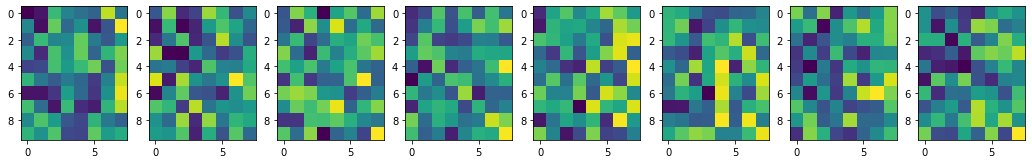

In [0]:
# 두번째 컨볼루션 필터 시각화
M = 8
plt.figure(figsize=(18, 6))

for i in range(M):
    plt.subplot(1, M, i + 1)  # Subplot from 1 to 8
    plt.imshow(filter_2[:, :, i]) # (10, 16) filter showing -> (10, 16) = (10, 1)filter * 16
    plt.grid(False)

In [0]:
# 각각의 레이어에서의 출력을 확인하기
import tensorflow.keras.backend as K

# Outputs of each layers
f0 = K.function([model2.input], [model2.layers[0].output])
f1 = K.function([model2.input], [model2.layers[1].output])
f2 = K.function([model2.input], [model2.layers[2].output])
f3 = K.function([model2.input], [model2.layers[3].output])
f4 = K.function([model2.input], [model2.layers[4].output])
f5 = K.function([model2.input], [model2.layers[5].output])
f6 = K.function([model2.input], [model2.layers[6].output])
f7 = K.function([model2.input], [model2.layers[7].output])


In [0]:
n = 0
x = train_data[n:n+1]

x.shape

(1, 600, 1)

Text(0.5, 1, 'Input data')

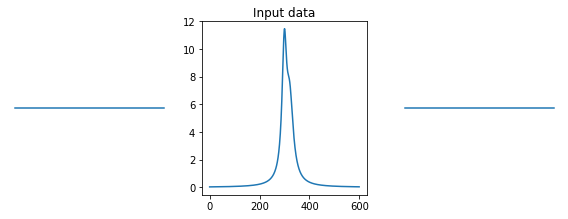

In [0]:
plt.figure(figsize=(8, 3))  # 피규어 생성하고

for i in range(3): 
    plt.subplot(1, 3, i + 1)  # three Subplot generated
    if i == 1:                # center plot
        plt.plot(x[0])        # image showed
    else:  
        plt.plot(np.zeros_like(x[0]))  # zero image
        plt.axis("off")
plt.tight_layout()
plt.suptitle("Input data", y=1)

In [0]:
# 1번째 컨볼루션 층 출력결과
z0 = f0([x])[0]
z0.shape

(1, 581, 8)

Text(0.5, 1.1, 'After Cnvolution filter')

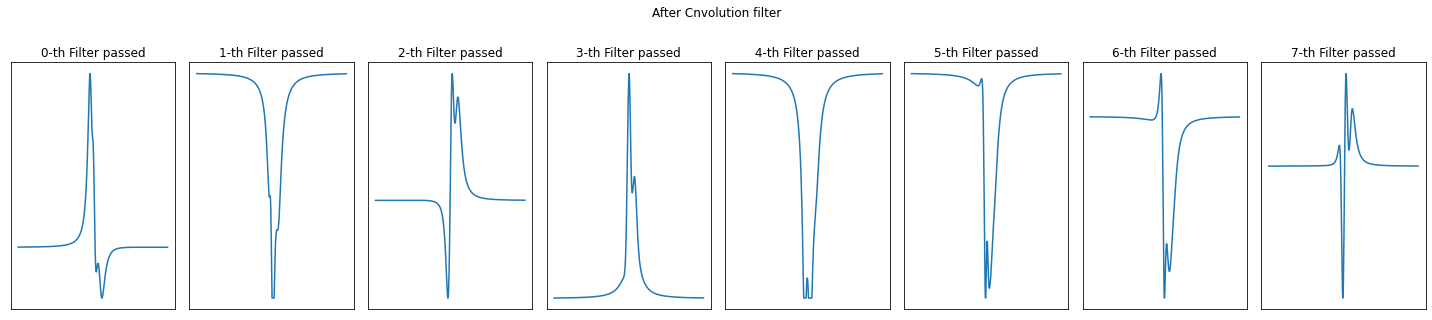

In [0]:
plt.figure(figsize=(20, 4))

for i in range(8):
    plt.subplot(1, 8, i + 1)
    plt.plot(z0[0, :, i])
    plt.axis('on')
    plt.xticks([]); plt.yticks([]); plt.grid(False)
    plt.title("{}-th Filter passed".format(i))
plt.tight_layout()
plt.suptitle("After Cnvolution filter", y=1.1)

In [0]:
# 2번째 맥스풀링층 출력 결과
z1 = f1([x])[0]
print(z1.shape)


(1, 290, 8)


Text(0.5, 1.1, 'After MaxPooling1D')

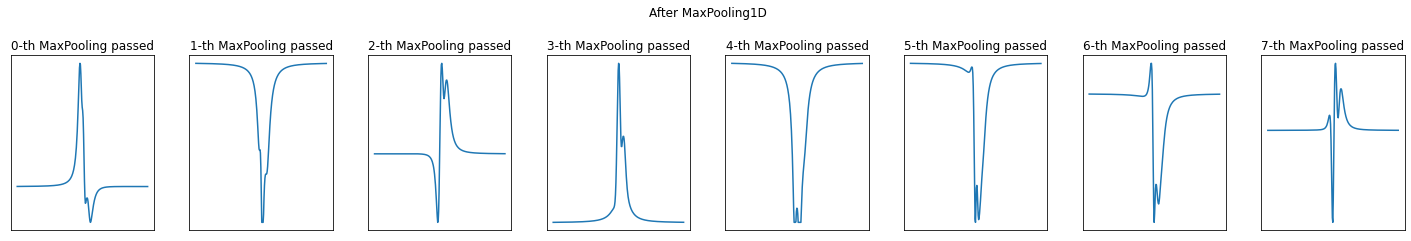

In [0]:
plt.figure(figsize=(20, 3))

for i in range(8):
    plt.subplot(1, 8, i + 1)
    plt.plot(z1[0, :, i])
    plt.xticks([]); plt.yticks([]); plt.grid(False)
    plt.title("{}-th MaxPooling passed".format(i))
plt.tight_layout()
plt.suptitle("After MaxPooling1D", y=1.1)
        

In [0]:
# 3번째 컨볼루션 층 출력결과
z2 = f2([x])[0]
print(z2.shape)

(1, 281, 8)


Text(0.5, 1.1, 'After 2nd Conv1D')

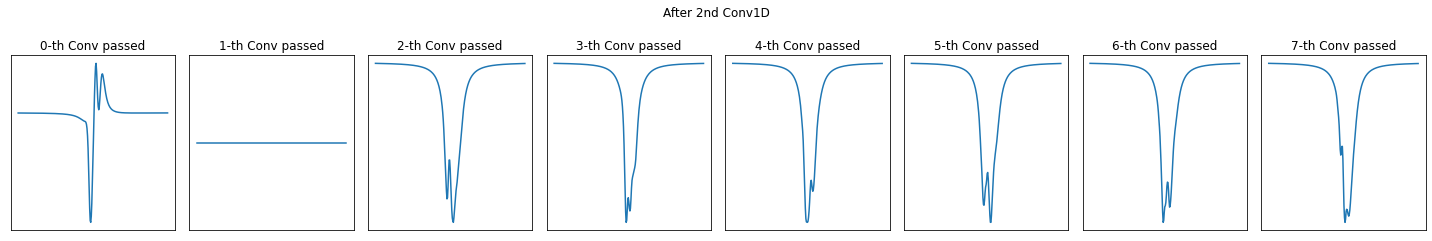

In [0]:
plt.figure(figsize=(20, 3))

for i in range(8):
    plt.subplot(1, 8, i + 1)
    plt.plot(z2[0, :, i])
    plt.xticks([]); plt.yticks([]); plt.grid(False)
    plt.title("{}-th Conv passed".format(i))
plt.tight_layout()
plt.suptitle("After 2nd Conv1D", y=1.1)

In [0]:
# 4번째 MaxPooling 층 출력결과
z3 = f3([x])[0]
print(z3.shape)

(1, 140, 8)


Text(0.5, 1.1, 'After 2nd MaxPooling')

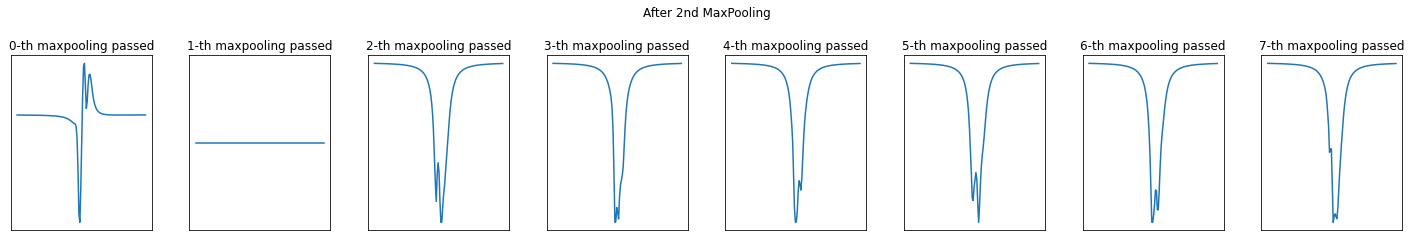

In [0]:
plt.figure(figsize=(20, 3))

for i in range(8):
    plt.subplot(1, 8, i + 1)
    plt.plot(z3[0, :, i])
    plt.xticks([]); plt.yticks([]); plt.grid(False)
    plt.title("{}-th maxpooling passed".format(i))
plt.tight_layout()
plt.suptitle("After 2nd MaxPooling", y=1.1)

In [0]:
# 5번째층 GlobalMaxPooling층 출력 결과
z4 = f4([x])[0]
print(z4.shape)
print(z4)

(1, 8)
[[21.161888  0.       18.96087  19.057402 20.049934 20.816692 20.259176
  19.38742 ]]


Text(0.5, 1.0, 'vectorizing')

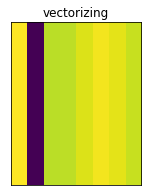

In [0]:
plt.figure(figsize=(10, 3))
plt.imshow(z4, aspect=10)
plt.xticks([]); plt.yticks([]); plt.grid(False)
plt.title("vectorizing")

(1, 200)


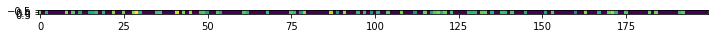

In [0]:
# 6번째층 Dense Layer(Fully Connected Layer) 출력 결과
z5 = f5([x])[0]
print(z5.shape)

plt.figure(figsize=(12, 4))
plt.imshow(z5)
plt.show()

(1, 200)


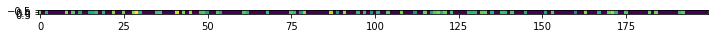

In [0]:
# 7번째 Dropout 층 출력 결과
z6 = f6([x])[0]
print(z6.shape)

plt.figure(figsize=(12, 4))
plt.imshow(z6)
plt.show()

[[602.1478     2.028274]]


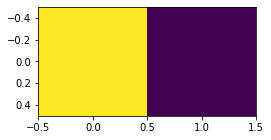

In [0]:
# 8번째 최종출력층 출력 결과
z7 = f7([x])[0]
print(z7)

plt.figure(figsize=(10,2))
plt.imshow(z7)
plt.show()

In [0]:
# 1차원 데이터에 대응되는 라벨을 뭘로?? 지금은 적분값과, 피크수 => 따라서 출력층의 뉴런은 2개

# 각 컨볼루션 층에서의 필터가 의미하는 것??
# 각각의 레이어의 정보를 완전히 표현하는 방법 공부